Diabetes-Prediction

In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
#Load the data
data="/Exporatory data anaysis/data/diabetes.csv"

In [4]:
#convert data into df
df = pd.read_csv("C:/Users/salma/OneDrive/Desktop/EDA-diabetes/data/diabetes.csv")

Data Descriptions

This dataset originates from the National Institute of Diabetes and Digestive and Kidney Diseases. Its purpose is to predict whether a patient has diabetes based on specific diagnostic measurements. The data includes various variables, with some being independent medical predictor variables, and one target dependent variable named "Outcome." All patients in this dataset are females of at least 21 years old and of Pima Indian heritage.

Data Source:

AKSHAY DATTATRAY KHARE, 2022

Data Variables

* Pregnancies : To express the Number of pregnancies

* Glucose : To express the Glucose level in blood

* BloodPressure : To express the Blood pressure measurement

* SkinThickness : To express the thickness of the skin

* Insulin : To express the Insulin level in blood

* BMI : To express the Body mass index

* DiabetesPedigreeFunction : To express the Diabetes percentage

* Age : To express the age

* Outcome : To express the final result 1 is Yes and 0 is No

Explore Data

* check shape
* check missing values
* explore data get summary stats

In [5]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
print(f"Shape: {df.shape}\n")
print(f"\ndatatypes: \n{df.dtypes}")

Shape: (768, 9)


datatypes: 
Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object


In [7]:
total_missing = df.isnull().sum().sum()
print("Total missing values in the DataFrame:", total_missing)

Total missing values in the DataFrame: 0


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


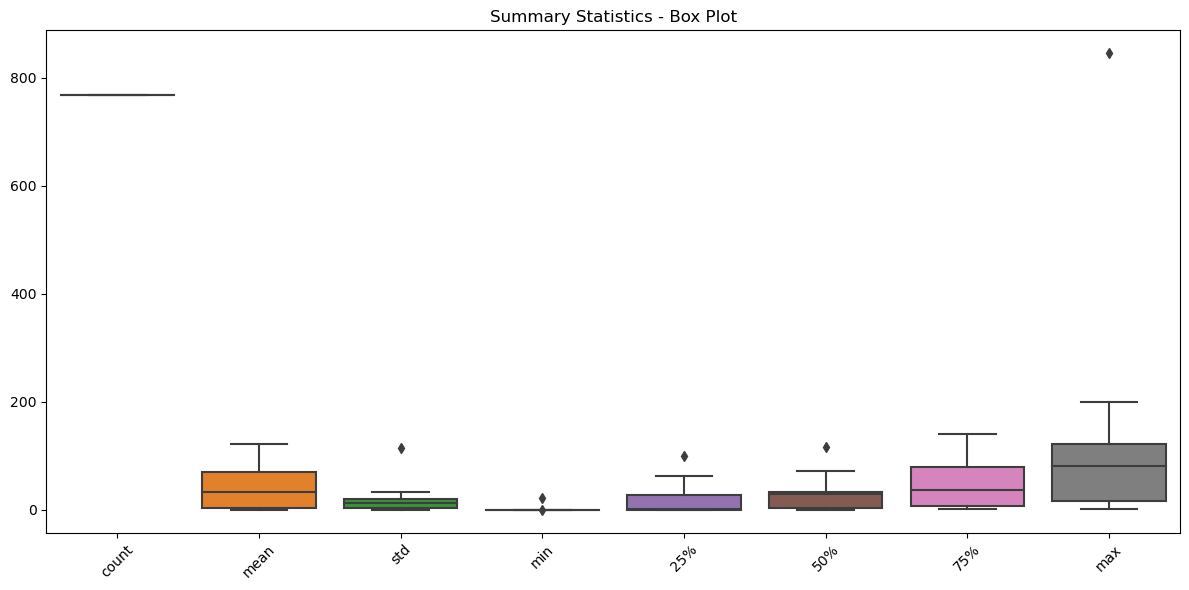

<Figure size 1800x900 with 0 Axes>

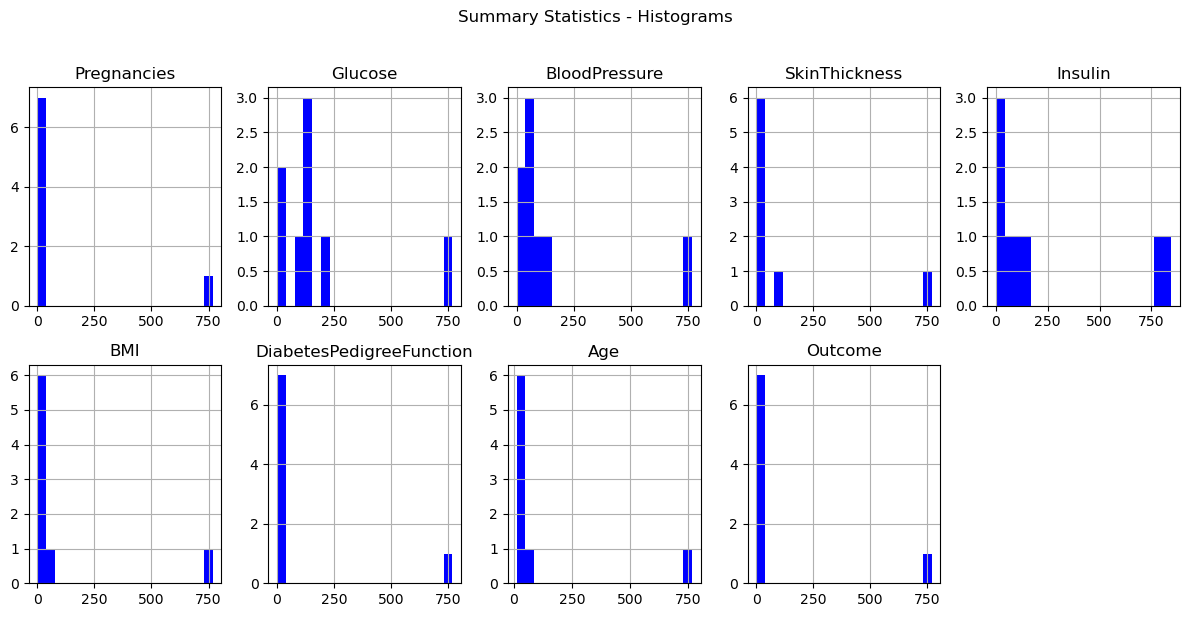

In [9]:
summary_stats = df.describe()

# Visualize using box plots
plt.figure(figsize=(12, 6), dpi=100)
sns.boxplot(data=summary_stats.transpose())
plt.title('Summary Statistics - Box Plot')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Visualize using histograms
plt.figure(figsize=(12, 6), dpi=150)
summary_stats.hist(bins=20, layout=(2, 5), figsize=(12, 6), color='blue')
plt.suptitle('Summary Statistics - Histograms', y=1.02)
plt.tight_layout()
plt.show()


In [10]:
df1 = df[df["Outcome"]==1]
one_outcome = df1.mean()
print("Outcome == 1 Mean")
print(f"{one_outcome}")

Outcome == 1 Mean
Pregnancies                   4.865672
Glucose                     141.257463
BloodPressure                70.824627
SkinThickness                22.164179
Insulin                     100.335821
BMI                          35.142537
DiabetesPedigreeFunction      0.550500
Age                          37.067164
Outcome                       1.000000
dtype: float64


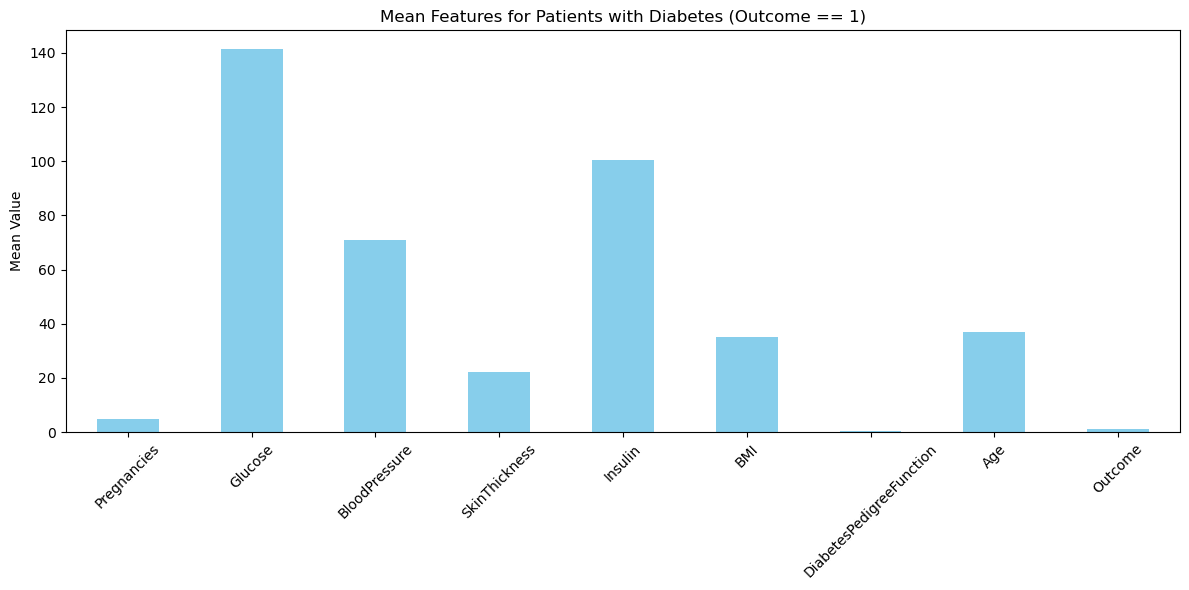

In [12]:
df_diabetes = df[df['Outcome'] == 1]

# Calculate the mean of features for patients with diabetes
mean_features_diabetes = df_diabetes.mean()

# Plot the mean values for each feature
plt.figure(figsize=(12, 6),dpi=100)
mean_features_diabetes.plot(kind='bar', color='skyblue')
plt.title('Mean Features for Patients with Diabetes (Outcome == 1)')
plt.ylabel('Mean Value')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [13]:
df1 = df[df["Outcome"]==0]
zero_outcome = df1.mean()
print("Outcome == 0 Mean")
print(f"{zero_outcome}")

Outcome == 0 Mean
Pregnancies                   3.298000
Glucose                     109.980000
BloodPressure                68.184000
SkinThickness                19.664000
Insulin                      68.792000
BMI                          30.304200
DiabetesPedigreeFunction      0.429734
Age                          31.190000
Outcome                       0.000000
dtype: float64


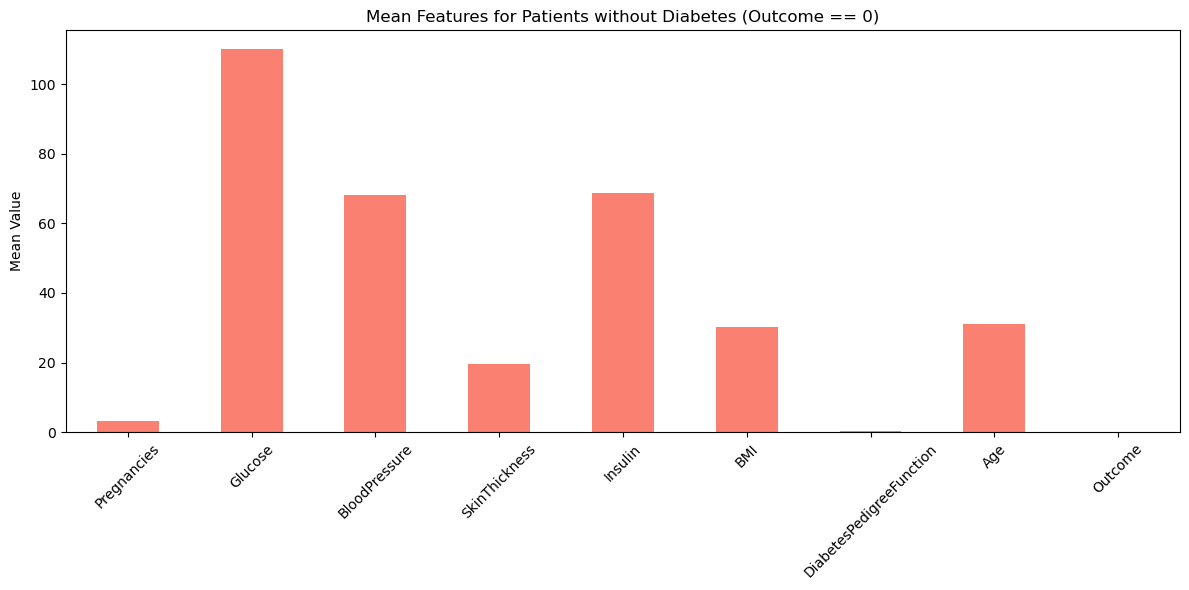

In [14]:
df_no_diabetes = df[df['Outcome'] == 0]

# Calculate the mean of features for patients without diabetes
mean_features_no_diabetes = df_no_diabetes.mean()

# Plot the mean values for each feature
plt.figure(figsize=(12, 6),dpi=100)
mean_features_no_diabetes.plot(kind='bar', color='salmon')
plt.title('Mean Features for Patients without Diabetes (Outcome == 0)')
plt.ylabel('Mean Value')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [15]:
mean_values = df.mean()

print("Mean values for each column:")
print(mean_values)

Mean values for each column:
Pregnancies                   3.845052
Glucose                     120.894531
BloodPressure                69.105469
SkinThickness                20.536458
Insulin                      79.799479
BMI                          31.992578
DiabetesPedigreeFunction      0.471876
Age                          33.240885
Outcome                       0.348958
dtype: float64


Summary Statistics

Mean values for each column:

* Pregnancies 3.845052
* Glucose 120.894531
* BloodPressure 69.105469
* SkinThickness 20.536458
* Insulin 79.799479
* BMI 31.992578
* DiabetesPedigreeFunction 0.471876
* Age 33.240885
* Outcome 0.348958

Feature correlation with dependent variable

In [16]:
X = df.drop('Outcome', axis=1)  # Features
y = df['Outcome']  # Target variable

#model
log_reg = LogisticRegression(solver='liblinear')
log_reg.fit(X, y)
# Get the coefficients for each feature
feature_importance = pd.Series(log_reg.coef_[0], index=X.columns)
# Sort features by absolute value of coefficients to find the most important ones
sorted_features = feature_importance.abs().sort_values(ascending=False)

print("Feature importances (absolute values of coefficients):")
print(sorted_features)

Feature importances (absolute values of coefficients):
DiabetesPedigreeFunction    0.676128
Pregnancies                 0.116994
BMI                         0.059720
Glucose                     0.028373
BloodPressure               0.016898
Age                         0.007235
SkinThickness               0.000755
Insulin                     0.000641
dtype: float64


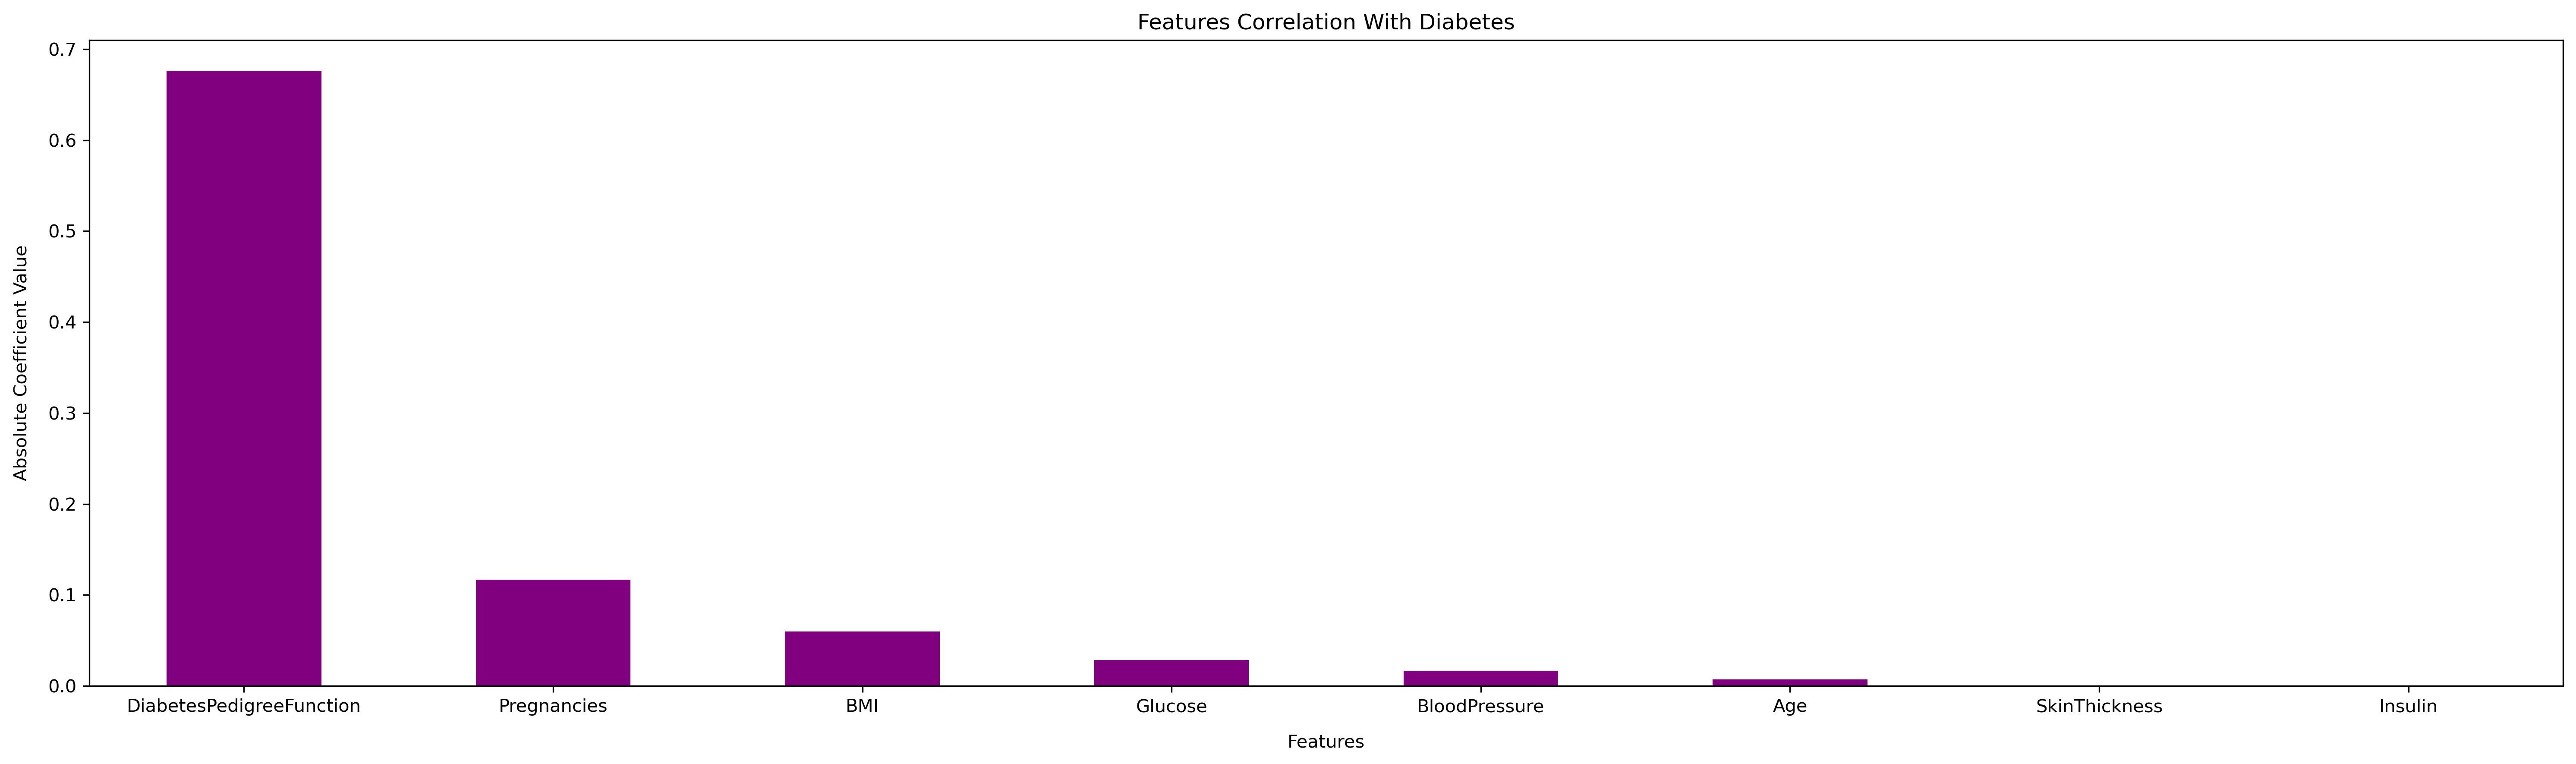

In [18]:
# Create a bar plot for the feature importances
plt.figure(figsize=(20, 6),dpi=300)
sorted_features.plot(kind='bar', color='purple')
plt.xlabel('Features', labelpad=10)
plt.ylabel('Absolute Coefficient Value', labelpad=10)
plt.title('Features Correlation With Diabetes')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

Create Logistics Model to predict Dependent Outcome variable [0,1]

In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load your dataset into a DataFrame (assuming df is your DataFrame)
# Preprocess the data if needed

# Split the data into features (X) and target (y)
X = df.drop('Outcome', axis=1)  # Features
y = df['Outcome']  # Target variable

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the logistic regression model
log_reg = LogisticRegression(solver='liblinear')  # Change the solver
log_reg.fit(X_train, y_train)

# Predict the outcomes on the test set
y_pred = log_reg.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("\nModel Accuracy:", accuracy)
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)


Model Accuracy: 0.7597402597402597

Confusion Matrix:
[[83 16]
 [21 34]]

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.84      0.82        99
           1       0.68      0.62      0.65        55

    accuracy                           0.76       154
   macro avg       0.74      0.73      0.73       154
weighted avg       0.76      0.76      0.76       154



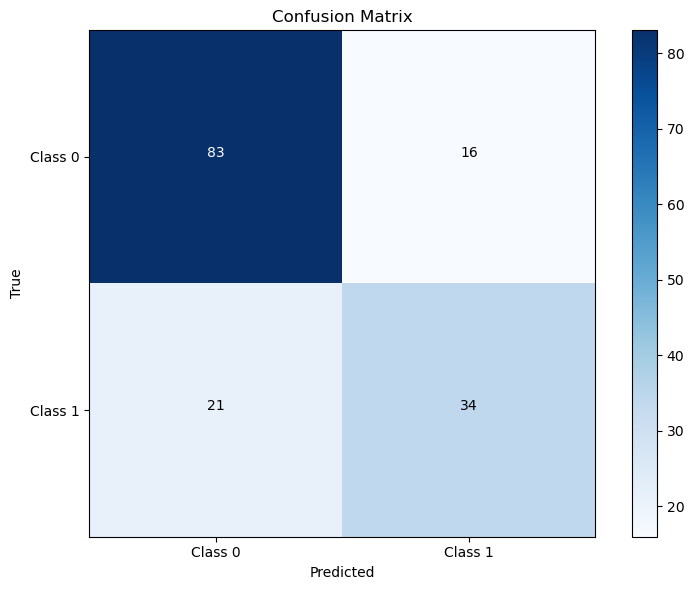

In [20]:
import matplotlib.pyplot as plt

# ... (existing code)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6), dpi=100)
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.get_cmap('Blues'))
plt.title('Confusion Matrix')
plt.colorbar()

classes = ['Class 0', 'Class 1'] 

tick_marks = [0, 1]
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)

plt.xlabel('Predicted')
plt.ylabel('True')

for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        plt.text(j, i, format(conf_matrix[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if conf_matrix[i, j] > conf_matrix.max() / 2. else "black")

plt.tight_layout()
plt.show()

Test New Model



Low Risk patient

In [21]:
new_record = {
    'Pregnancies': 5,
    'Glucose': 120,
    'BloodPressure': 70,
    'SkinThickness': 30,
    'Insulin': 100,
    'BMI': 25.0,
    'DiabetesPedigreeFunction': 0.4,
    'Age': 35
}

High Risk patient

In [22]:
new_record_high_risk = {
    'Pregnancies': 8,
    'Glucose': 170,
    'BloodPressure': 90,
    'SkinThickness': 35,
    'Insulin': 150,
    'BMI': 30.0,
    'DiabetesPedigreeFunction': 0.8,
    'Age': 45
}

In [23]:
new_record_high_risk = {
    'Pregnancies': 8,
    'Glucose': 170,
    'BloodPressure': 90,
    'SkinThickness': 35,
    'Insulin': 150,
    'BMI': 30.0,
    'DiabetesPedigreeFunction': 0.8,
    'Age': 45
}

new_record_df = pd.DataFrame([new_record_high_risk])
predicted_outcome = log_reg.predict(new_record_df)

if predicted_outcome[0] == 0:
    print("Low chance of diabetes type 2")
else:
    print("High chance of diabetes type 2")
print("Predicted Outcome for the New Record:", predicted_outcome[0])

High chance of diabetes type 2
Predicted Outcome for the New Record: 1


Conclusion


Our model predicts with 75% accuracy whether a patient given that they have the required datapoints if they have diabete types 2 or not.

required datapoints

* Number of Pregnancies
* Glucose
* BloodPressure (diastolic, given that the average BloodPressure is 69.10 since systolic is usually from the range of 90 to 150+ )
* SkinThickness
* Insulin
* BMI
* Diabetes Pedigree Function
* Age

Based on features and their correaltion to our dependent variable (Outcome == 1) Glucose, Insulin, and Bloodpressure have strong correlation that can imply a high likelyhood that the patient has diabetes. When factoring our entire dataset with diabetic and non-diabetic patients our model assumes that the Diabetes Pedigree Function has the highest indication of predicting diabetes in a patient.

Tuning and improving model accuracy


This model applies only to this population. They are of Pima Indian heritage. All patients are females and are all above the age of 21. This data contains a small dataset of only 768 patients.By increasing the dataset size it is plausible that it might increase our model's accuracy. But 75% is acceptable given the size of our dataset, it also helps that the dataset does not have any missing data, it is complete